In [3]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...


In [4]:
!pip install --upgrade keras

  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


You should consider upgrading via the 'c:\users\milind.desktop-gbr1bs2\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [5]:
%cd keras-retinanet

C:\Users\Milind.DESKTOP-GBR1BS2\object-detector\keras-retinanet


In [12]:
!pip install .

Processing c:\users\milind.desktop-gbr1bs2\object-detector\keras-retinanet
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp38-cp38-win_amd64.whl size=128655 sha256=f388b629865073d60b0681ad497369ced23147a52b95714d9b609b7679a3d719
  Stored in directory: c:\users\milind.desktop-gbr1bs2\appdata\local\pip\cache\wheels\6e\ad\cc\2c7fb971522c6cda92e8886e64b62c81f761196d111fbb75b3
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=fa4fcb83999a127353ea1ce4a6aea492218b2ec96a6a7e683a301ac62c6e3a1b
  Stored in directory: c:\users\milind.desktop-gbr1bs2\appdata\local\pip\cache\wheels\be\90\98\9d455f04a7ca277366b36c660c89d171ff5abb7bdd8a8b8e75
Successfully built keras-retinanet keras-resnet


In [13]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils\compute_overlap.c' Cython extension (up-to-date)
copying build\lib.win-amd64-3.8\keras_retinanet\utils\compute_overlap.cp38-win_amd64.pyd -> keras_retinanet\utils


In [14]:
!pip install gdown
!pip install tensorflow-gpu

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14262 sha256=e5b137a7ebb7a1b20e406d3a62c8b07a6f0c5e54ad60ea671a868426e8a9050c
  Stored in directory: c:\users\milind.desktop-gbr1bs2\appdata\local\pip\cache\wheels\2b\3c\51\52c46deda5cd1d59c6ce3d441ea5f3d155495dc294c4535a25
Successfully built gdown


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.

  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0



tensorflow 2.5.0 requires tensorflow-estimator<2.6.0,>=2.5.0rc0, but you have tensorflow-estimator 2.7.0 which is incompatible.


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [16]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [17]:
!gdown --id 1mTtB8GTWs74Yeqm0KMExGJZh1eDbzUlT --output indian_number_plates.json

Downloading...
From: https://drive.google.com/uc?id=1mTtB8GTWs74Yeqm0KMExGJZh1eDbzUlT
To: C:\Users\Milind.DESKTOP-GBR1BS2\object-detector\keras-retinanet\indian_number_plates.json

  0%|          | 0.00/92.5k [00:00<?, ?B/s]
100%|##########| 92.5k/92.5k [00:00<00:00, 23.2MB/s]


In [18]:
os.makedirs("snapshots", exist_ok=True)

In [19]:
!gdown --id 1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R --output snapshots/resnet50_csv_10.h5

Downloading...
From: https://drive.google.com/uc?id=1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R
To: C:\Users\Milind.DESKTOP-GBR1BS2\object-detector\keras-retinanet\snapshots\resnet50_csv_10.h5

  0%|          | 0.00/249M [00:00<?, ?B/s]
  0%|          | 524k/249M [00:00<00:49, 4.97MB/s]
  1%|          | 1.57M/249M [00:00<00:43, 5.72MB/s]
  1%|1         | 2.62M/249M [00:00<00:45, 5.37MB/s]
  1%|1         | 3.67M/249M [00:00<00:43, 5.60MB/s]
  2%|1         | 4.72M/249M [00:00<00:43, 5.56MB/s]
  2%|2         | 5.77M/249M [00:01<00:41, 5.85MB/s]
  3%|2         | 6.82M/249M [00:01<00:40, 6.01MB/s]
  3%|3         | 7.86M/249M [00:01<00:40, 5.93MB/s]
  4%|3         | 8.91M/249M [00:01<00:39, 6.01MB/s]
  4%|4         | 9.96M/249M [00:01<00:40, 5.91MB/s]
  4%|4         | 11.0M/249M [00:01<00:39, 5.96MB/s]
  5%|4         | 12.1M/249M [00:02<00:40, 5.88MB/s]
  5%|5         | 13.1M/249M [00:02<00:40, 5.79MB/s]
  6%|5         | 14.2M/249M [00:02<00:39, 5.96MB/s]
  6%|6         | 15.2M/249M [00:02<00:40, 5.82

In [20]:
plates_df = pd.read_json('indian_number_plates.json', lines=True)

In [21]:
os.makedirs("number_plates", exist_ok=True)

In [87]:
dataset = dict()
dataset["image_name"] = list()
dataset["x_min"] = list()
dataset["y_min"] = list()
dataset["x_max"] = list()
dataset["y_max"] = list()
dataset["class_name"] = list()


dataset["image_name"].append('C:/FAU/bottle_detector/Images/OceanPlasticBottoles/PXL_20210925_121859209.NIGHT.jpg')    
data = row["annotation"]


dataset["x_min"].append(int(1401))
dataset["y_min"].append(int(1301))
dataset["x_max"].append(int(2662))
dataset["y_max"].append(int(1887))
dataset["class_name"].append("bottle")

dataset["image_name"].append('C:/FAU/bottle_detector/Images/OceanPlasticBottoles/PXL_20210925_121915746.jpg')    
data = row["annotation"]

dataset["x_min"].append(int(1280))
dataset["y_min"].append(int(1076))
dataset["x_max"].append(int(1944))
dataset["y_max"].append(int(1405))
dataset["class_name"].append("bottle")

dataset["image_name"].append('C:/FAU/bottle_detector/Images/OceanPlasticBottoles/PXL_20210925_121904151.NIGHT.jpg')    
data = row["annotation"]

dataset["x_min"].append(int(1612))
dataset["y_min"].append(int(1280))
dataset["x_max"].append(int(2180))
dataset["y_max"].append(int(1662))
dataset["class_name"].append("bottle")

In [88]:
df = pd.DataFrame(dataset)
df.head()

image_name  x_min  y_min  x_max  \
0  C:/FAU/bottle_detector/Images/OceanPlasticBott...   1401   1301   2662   
1  C:/FAU/bottle_detector/Images/OceanPlasticBott...   1280   1076   1944   
2  C:/FAU/bottle_detector/Images/OceanPlasticBott...   1612   1280   2180   

   y_max class_name  
0   1887     bottle  
1   1405     bottle  
2   1662     bottle

In [80]:
def show_image_objects(image_row):

    print(image_row)
    img_path = image_row.image_name
    box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
    ]

    image = read_image_bgr(img_path)

    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    draw_box(draw, box, color=(255, 255, 0))

    plt.axis('off')
    plt.imshow(draw)
    plt.show()

image_name    C:/FAU/bottle_detector/Images/OceanPlasticBott...
x_min                                                      1612
y_min                                                      1280
x_max                                                      2180
y_max                                                      1662
class_name                                               bottle
Name: 2, dtype: object


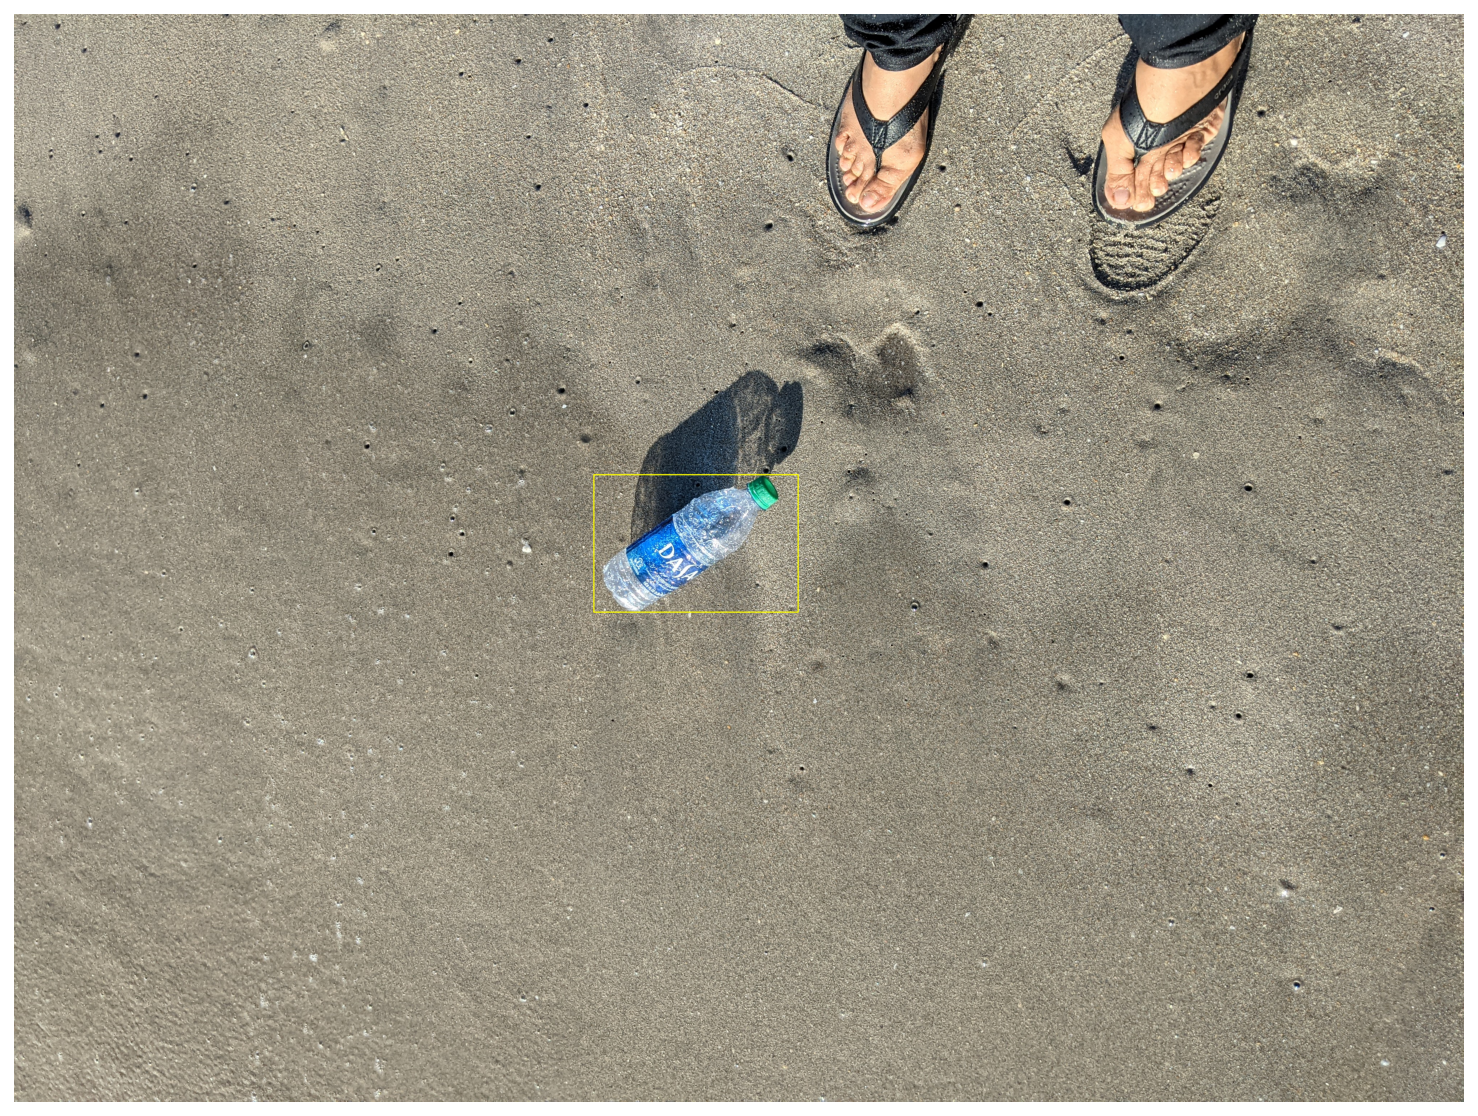

In [89]:
show_image_objects(df.iloc[2])

In [90]:
train_df, test_df = train_test_split(
  df, 
  test_size=0.2, 
  random_state=RANDOM_SEED
)

In [91]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [92]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

In [93]:
classes = set(['bottle'])

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [94]:
!head classes.csv

bottle,0


In [95]:
!head annotations.csv

C:/FAU/bottle_detector/Images/OceanPlasticBottoles/PXL_20210925_121915746.jpg,1280,1076,1944,1405,bottle
C:/FAU/bottle_detector/Images/OceanPlasticBottoles/PXL_20210925_121904151.NIGHT.jpg,1612,1280,2180,1662,bottle


In [96]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [103]:
os.getcwd()

'C:\\Users\\Milind.DESKTOP-GBR1BS2\\object-detector\\keras-retinanet'

In [109]:
!python keras_retinanet/bin/train.py \
--freeze-backbone \
--random-transform \
--weights {PRETRAINED_MODEL} \
--batch-size 8 \
--steps 500 \
--epochs 10 \
csv annotations.csv classes.csv

2021-12-05 22:46:51.996939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-05 22:46:51.997010: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "keras_retinanet/bin/train.py", line 34, in <module>
    from .. import layers  # noqa: F401
  File "keras_retinanet/bin\..\..\keras_retinanet\layers\__init__.py", line 1, in <module>
    from ._misc import RegressBoxes, UpsampleLike, Anchors, ClipBoxes  # noqa: F401
  File "keras_retinanet/bin\..\..\keras_retinanet\layers\_misc.py", line 20, in <module>
    from ..utils import anchors as utils_anchors
  File "keras_retinanet/bin\..\..\keras_retinanet\utils\anchors.py", line 20, in <module>
    from ..utils.compute_overlap import compute_overlap
ImportError: DLL load failed while importing compute_overlap: The par